In [ ]:
!pip install wordcloud==1.8.2.2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud


<h3>Dataset: Amazon books dataset</h3>

The dataset contains 946 books obtained from scraping Amazon books related to data science, statistics, data analysis, Python, deep learning, and machine learning.

There are 18 columns:

title: title of the book
<br>author: author (or the authors) of the book
<br>price: price (in dollars)
<br>pages: number of pages
<br>avg_reviews: average reviews (out of 5)
<br>n_reviews: reviews done for each book
<br>star5: percentage of 5 star reviews
<br>star4: percentage of 4 star reviews
<br>star3: percentage of 3 star reviews
<br>star2: percentage of 2 star reviews
<br>star1: percentage of 1 star reviews
<br>dimensions: size of the book (in inches)
<br>weight: weight (in pounds or ounces)
<br>language: language of the book
<br>publisher: publisher
<br>ISBN-13: ISBN_13 code
<br>link: link of the Amazon book
<br>complete_link: complete link of the Amazon book (including the domain https://amazon.com)


Reference:  https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books

In [ ]:
df= pd.read_csv('final_book_dataset_kaggle.csv')

In [ ]:
df.head(5)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...


In [ ]:
df.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1
count,944.000000,934.000000,823.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,52.103528,419.356531,4.442163,137.754757,0.625603,0.140835,0.058192,0.026575,0.018732
std,36.590725,203.984911,0.401256,499.485754,0.279219,0.113105,0.061997,0.038293,0.032132
min,4.730000,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.907500,272.000000,4.300000,5.000000,0.570000,0.070000,0.000000,0.000000,0.000000
50%,43.985000,384.000000,4.500000,25.000000,0.700000,0.140000,0.050000,0.010000,0.000000
75%,56.765000,531.500000,4.700000,91.000000,0.780000,0.190000,0.090000,0.040000,0.030000
max,279.950000,1728.000000,5.000000,7563.000000,1.000000,0.630000,0.400000,0.250000,0.230000


### Correlation 

In [ ]:
df.corr()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1
price,1.000000,0.444523,-0.080419,-0.075195,-0.055966,-0.131952,-0.089569,0.005286,0.088955
pages,0.444523,1.000000,0.055910,0.069833,0.135059,-0.044626,-0.023500,0.055927,0.107799
avg_reviews,-0.080419,0.055910,1.000000,0.075154,0.680807,-0.405575,-0.488914,-0.443377,-0.318778
n_reviews,-0.075195,0.069833,0.075154,1.000000,0.117192,0.003250,0.006805,-0.021830,0.091984
star5,-0.055966,0.135059,0.680807,0.117192,1.000000,0.092087,0.013784,-0.005893,0.043879
star4,-0.131952,-0.044626,-0.405575,0.003250,0.092087,1.000000,0.282943,0.117888,0.038144
star3,-0.089569,-0.023500,-0.488914,0.006805,0.013784,0.282943,1.000000,0.458149,0.212710
star2,0.005286,0.055927,-0.443377,-0.021830,-0.005893,0.117888,0.458149,1.000000,0.367137
star1,0.088955,0.107799,-0.318778,0.091984,0.043879,0.038144,0.212710,0.367137,1.000000


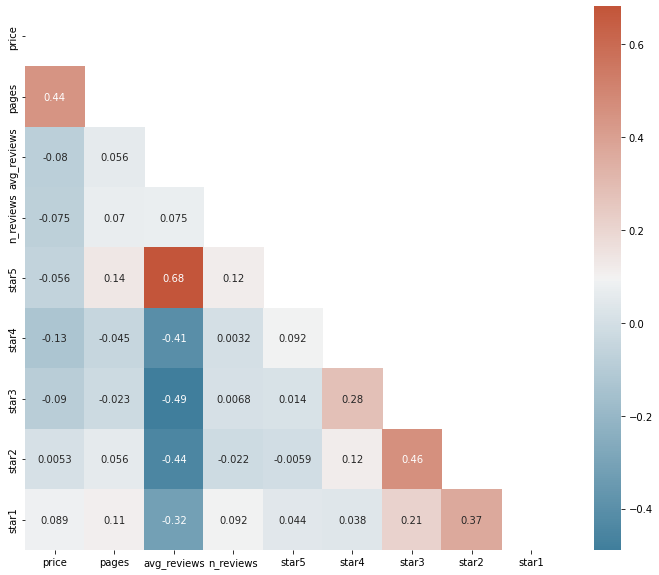

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Price & pages,star5 rating & average reviews have the moderate positive correlation. While the star ratings less than 5 has moderate negative correlation. 

In [ ]:
px.scatter(df, x='pages', y='price', size='n_reviews',color='avg_reviews',color_continuous_scale='RdBu_r')

We can observe a linear relationship between price and pages. As the pages increases, price is increasing moderately. The number of reviews are higher for books with pages between 400 and 800. Also, the reviews are mostly positive.

### Publisher with highest count of books in the dataset

In [ ]:
publisher_list={}
for i in range(len(df)):
  if type(df['publisher'][i])!=float:

    p_name=df['publisher'][i].split('(')[0].split(';')[0].strip()
    if p_name not in publisher_list:
      publisher_list[p_name]=1
    else:
      publisher_list[p_name]+=1


sorted_publisher_list = sorted(publisher_list.items(), key=lambda x:x[1], reverse=True)

popular_publisher = pd.DataFrame({"publisher name":[x for x, y in sorted_publisher_list[:10]],"count":[y for x, y in sorted_publisher_list[:10]]})

fig = px.bar(popular_publisher, x='publisher name', y='count',
             title="Publisher list: Number of books listed")

fig.update_layout(
    width = 800,
    height = 800
)
fig.show()

Packt publishing has the highest number of books listed in the dataset (162 books) followed by OReilly media with 93 books.

### Frequent authors



In [ ]:
authors_count={}

for i in range(len(df)):
  if type(df['author'][i])!=float:
    df['author'][i] =df['author'][i].replace('[','').replace(']','')
    for j in df['author'][i].split(','):
      if j not in authors_count:
        authors_count[j]=1
      else:
        authors_count[j]+=1

sorted_authors_list = sorted(authors_count.items(), key=lambda x:x[1], reverse=True)

frequent_authors = pd.DataFrame({"author name":[x for x, y in sorted_authors_list[:10]],"count":[y for x, y in sorted_authors_list[:10]]})

fig = px.bar(frequent_authors, x='author name', y='count',
             title="Authors list: Number of books listed")
fig.update_layout(
    width = 800,
    height = 800
)

fig.show()

<ipython-input-34-3bb39f82cbb9>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Each book has a list of authors associated with each book. Benjamin Smith and Erick thompson has 5 books listed in the dataset.

### Top 10 most reviewed books

In [ ]:
top_10_largest_review_count=df['n_reviews'].nlargest(10).astype(int).sort_index()
ten_most_reviewed_books=df[df['n_reviews'] >= top_10_largest_review_count.min()]
ten_most_reviewed_books= ten_most_reviewed_books.sort_values('n_reviews', ascending=False)

In [ ]:
ten_most_reviewed_books['stripped_title'] = [i[0] for i in ten_most_reviewed_books['title'].str.split(':')]

In [ ]:
ten_most_reviewed_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,stripped_title
127,Cracking the Coding Interview: 189 Programming...,Gayle Laakmann McDowell,35.95,687.0,4.7,7563,0.81,0.12,0.04,0.01,0.02,7 x 1.59 x 10 inches,2.69 pounds,English,CareerCup; 6th edition (July 1 2015),978-0984782857,/Cracking-Coding-Interview-Programming-Questio...,https://www.amazon.com/Cracking-Coding-Intervi...,Cracking the Coding Interview
104,Python Crash Course 2nd Edition: A Hands-On Pr...,Eric Matthes,21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...,Python Crash Course 2nd Edition
813,Clean Code: A Handbook of Agile Software Craft...,NaN,47.49,464.0,4.7,4528,0.81,0.12,0.04,0.01,0.02,7 x 1.1 x 9.2 inches,1.46 pounds,English,Pearson; 1st edition (August 1 2008),978-0132350884,/Clean-Code-Handbook-Software-Craftsmanship/dp...,https://www.amazon.com/Clean-Code-Handbook-Sof...,Clean Code
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,Maurice J. Thompson,27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...,Python
237,Storytelling with Data: A Data Visualization G...,Cole Nussbaumer Knaflic,28.49,288.0,4.6,3313,0.76,0.15,0.05,0.01,0.02,7.4 x 0.9 x 9.2 inches,1.46 pounds,English,Wiley; 1st edition (November 2 2015),978-1119002253,/Storytelling-Data-Visualization-Business-Prof...,https://www.amazon.com/Storytelling-Data-Visua...,Storytelling with Data
31,Designing Data-Intensive Applications: The Big...,Martin Kleppmann,23.37,611.0,4.8,3167,0.85,0.09,0.03,0.01,0.02,7.01 x 1.24 x 9.17 inches,2.15 pounds,English,OReilly Media; 1st edition (May 2 2017),978-1449373320,/Designing-Data-Intensive-Applications-Reliabl...,https://www.amazon.com/Designing-Data-Intensiv...,Designing Data-Intensive Applications
819,Python: For Beginners: A Crash Course Guide To...,Timothy C. Needham,17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...,Python
19,The Art of Statistics: How to Learn from Data,David Spiegelhalter,17.99,448.0,4.6,2764,0.73,0.19,0.05,0.01,0.01,5.4 x 1.3 x 8.2 inches,13.6 ounces,English,Basic Books (August 17 2021),978-1541675704,/Art-Statistics-How-Learn-Data/dp/1541675703/r...,https://www.amazon.com/Art-Statistics-How-Lear...,The Art of Statistics
827,Automate the Boring Stuff with Python 2nd Edit...,Al Sweigart,26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...,Automate the Boring Stuff with Python 2nd Edition
320,Python for Everybody: Exploring Data in Python 3,"Dr. Charles Russell Severance,Sue Blumenberg e...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...,Python for Everybody


Text(0, 0.5, 'Number of reviews')

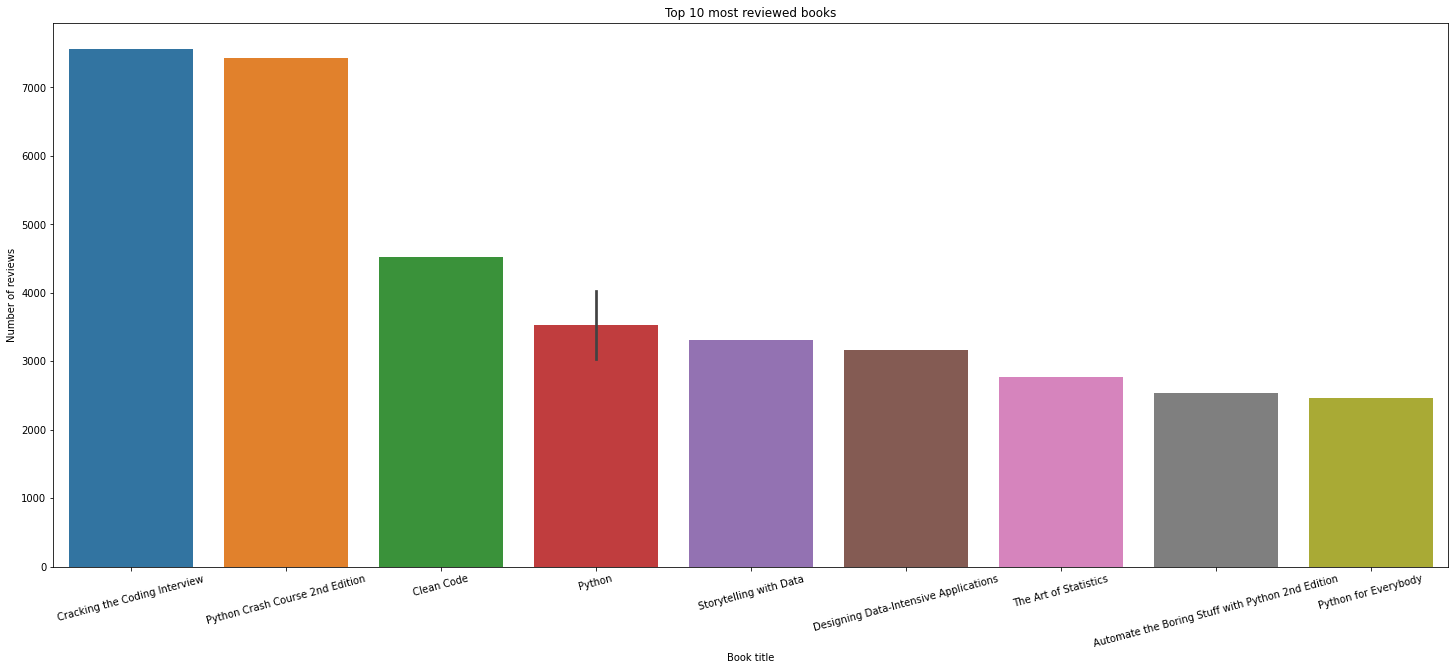

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(data=ten_most_reviewed_books, x='stripped_title',y='n_reviews')
plt.xticks(rotation=15)
plt.title('Top 10 most reviewed books')
plt.xlabel('Book title')
plt.ylabel('Number of reviews')

### Top 10 expensive books

In [ ]:
top_10_expensive_book=df['price'].nlargest(10).astype(int).sort_index()
top_10_expensive_book=df[df['price'] >= top_10_expensive_book.min()]
top_10_expensive_book= top_10_expensive_book.sort_values('price', ascending=False)

top_10_expensive_book['stripped_title'] = [i[0] for i in top_10_expensive_book['title'].str.split(':')]
fig =px.bar(top_10_expensive_book, x='stripped_title', y='price')


fig.update_layout(
    width = 800,
    height = 800,
    title = "Top ten expensive book"
)

fig.show()

### Best books with keyword 'python' grouped by average reviews and number of reviews

In [ ]:
python_books=df[df['title'].str.contains("Python")]


best_python_books= python_books.nlargest(5, ['n_reviews','avg_reviews'])
best_python_books[['title','author','price','avg_reviews','n_reviews']]

,title,author,price,avg_reviews,n_reviews
104,Python Crash Course 2nd Edition: A Hands-On Pr...,Eric Matthes,21.49,4.7,7425
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,Maurice J. Thompson,27.97,4.3,4033
819,Python: For Beginners: A Crash Course Guide To...,Timothy C. Needham,17.97,4.3,3034
827,Automate the Boring Stuff with Python 2nd Edit...,Al Sweigart,26.49,4.7,2538
320,Python for Everybody: Exploring Data in Python 3,"Dr. Charles Russell Severance,Sue Blumenberg e...",9.99,4.6,2467


The Python crash course written by Eric Matthes is the most popular python book based on the number of reviews and average reviews. The main reason for grouping by number of reviews and average review is to eliminate the bias (ex:  if a book has only review and if it is highly positive, it will have the high score)

### Best books with keyword 'Data Science' grouped by average reviews and number of reviews

In [ ]:
data_science_books=df[df['title'].str.contains("Data Science")]


data_science_books= data_science_books.nlargest(5, ['n_reviews','avg_reviews'])
data_science_books[['title','author','price','avg_reviews','n_reviews']]

,title,author,price,avg_reviews,n_reviews
937,R for Data Science: Import Tidy Transform Visu...,"Garrett Grolemund,Hadley Wickham",44.99,4.7,1361
4,Data Science for Business: What You Need to Kn...,"Foster Provost,Tom Fawcett",36.99,4.5,970
1,Ace the Data Science Interview: 201 Real Inter...,"Nick Singh,Kevin Huo",26.00,4.5,599
5,Data Science from Scratch: First Principles wi...,Joel Grus,45.22,4.4,594
9,Data Science (The MIT Press Essential Knowledg...,NaN,9.61,4.5,383


R is one of the top library preferred by data scientist. So, the book R for data science being on the top with highest number of reviews and 4.7 star rating seems reasonable.

### Clustering

For the clustering, KMeans is used. KMeans is an unsupervised learning method that clusters dataset into 'k' different clusters. Each sample is assigned to the cluster with the nearest mean and then the means are updated during iterative optimization process.

Steps:

1) Initialize random cluster centers <br>
2) Repeat until converged:
 - Update cluster points: Assign data points to the nearest cluster centroid
 - Update cluster centers: set center to the mean of each cluster

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

# transforming book title using Term Frequency-Inverse Document Frequency or TF-IDF
X = vectorizer.fit_transform(df["title"])

<h3> Calculating 'K' in KMeans: </h3>

There are several methods to calculate number of clusters in KMeans. Elbow method is one of the most popular method to calculate optimal number of 'K'. The iterative approach is to calculate Within-Cluster-Sum of Squared Errors (WSS) for different values of k. The squared distance between the data point and its predicted centroid is calculated using distance metrics like Eucledian or Manhattan distance.The sum of all squared errors of all data points gives WSS. Then, we choose the value of K where the WSS starts to diminish and forms an elbow like shape as the optimal cluster number.

In [ ]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=600, n_init=10)
   km.fit(X)
   sum_of_squared_distances.append(km.inertia_)

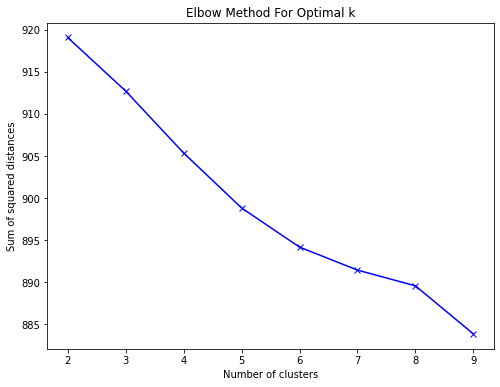

In [ ]:
fig = plt.figure(figsize=(8, 6))

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see a elbow shape forming at cluster 6. So, we will use that as optimal number of cluster in our dataset.

In [ ]:
optimal_k = 6
model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

labels = model.labels_
book_cluster = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cluster.sort_values(by=['cluster']))

                                                 title  cluster
945                  Psychology Statistics For Dummies        0
847                           Essentials of Statistics        0
848  Statistics for People Who (Think They) Hate St...        0
849  Statistics for the Behavioral Sciences - Stand...        0
850              Statistics for Business and Economics        0
..                                                 ...      ...
719  El lenguaje de programaciÃ³n Python de princip...        5
718                         Murachs Python Programming        5
717  Mastering Python: Write powerful and efficient...        5
714  Computational Cell Physiology: With Examples I...        5
472  Deep Discourse: A Framework for Cultivating St...        5

[946 rows x 2 columns]


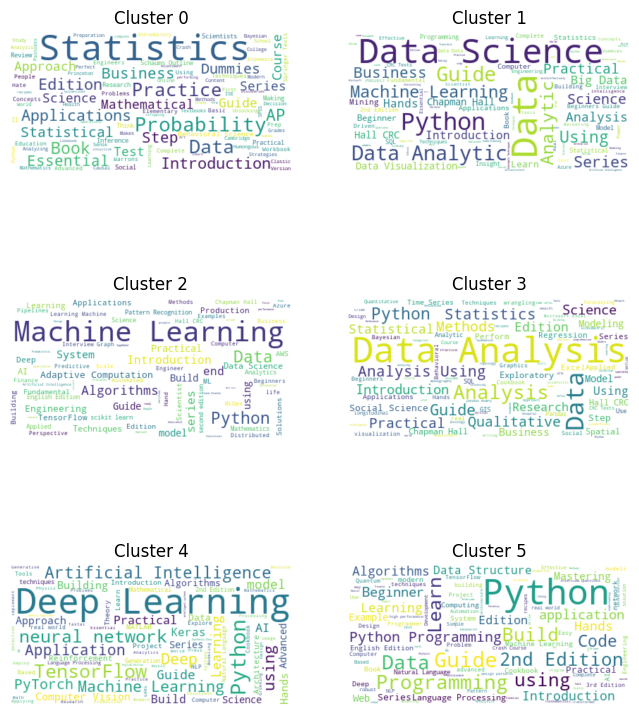

In [ ]:
plt.rcParams.update({'figure.figsize':(8,10), 'figure.dpi':100})

for k in range(optimal_k):
   text = book_cluster[book_cluster.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   plt.subplot(3, 2, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

In [ ]:
# Prediction on unseen data
test = vectorizer.transform(['convolutional neural network'])
model.predict(test)[0]

5

In [ ]:

for k in range(optimal_k):
  text = book_cluster[book_cluster.cluster == k]['title']
  cluster_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
  cluster_vectorized_array = cluster_vectorizer.fit_transform(text)
  cluster_mean= np.mean(cluster_vectorized_array.toarray(), axis = 0)
  sorted_means = np.argsort(cluster_mean)[::-1][:15]
  features = cluster_vectorizer.get_feature_names_out()
  best_features = [(features[i], cluster_mean[i]) for i in sorted_means]

  print('cluster number == ', k)
  print(list(zip(*best_features))[0])

  print('\n')



cluster number ==  0
('statistics', 'probability', 'practice', 'data', 'introduction', 'dummies', 'probability statistics', 'applications', 'sciences', 'business', 'ap', 'ap statistics', 'behavioral', 'statistics applications', 'practice statistics')


cluster number ==  1
('data', 'science', 'data science', 'analytics', 'python', 'guide', 'data analytics', 'learning', 'series', 'using', 'introduction', 'business', 'machine learning', 'machine', 'beginners')


cluster number ==  2
('learning', 'machine', 'machine learning', 'data', 'introduction', 'python', 'edition', 'series', 'introduction machine', 'algorithms', 'computation', 'computation machine', 'engineering', 'science', 'end')


cluster number ==  3
('data', 'analysis', 'data analysis', 'using', 'python', 'qualitative', 'statistics', 'introduction', 'social', 'guide', 'methods', 'analysis using', 'practical', 'qualitative data', 'sciences')


cluster number ==  4
('learning', 'deep', 'deep learning', 'python', 'intelligence', '